# Advertising Budgets-Sales Challenge

In this challenge, you'll explore a real-world dataset containing Sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, tv and newspaper.

- **TV**: Spend on TV Advertisements
- **Radio**: Spend on radio Advertisements
- **Newspaper**: Spend on newspaper Advertisements
- **Sales**: Sales revenue generated


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_advertisement = pd.read_csv('advertising.csv')


The challenge is to **explore the dataset to analyze and identify which media contribute to sales and to find a function that given input budgets for TV, radio and newspaper predicts the output sales.**

1. Start by cleaning the data.
   R - Identify any null or missing data, and impute appropriate replacement values.
   R - Describe and identify statistical parameters for each column.

2. Determine the relationship between the advertising budgets and sales, and to build a predictive model that can estimate sales based on the given budgets for TV, radio, and newspaper.
   **Exploratory Data Analysis (EDA)**: 
   * Describe and visualize the data to understand the distribution and relationships between variables
   * Calculate and plot heatmap correlation and pairwise correlations
   **Feature Engineering**: 
   * Create any additional features that might help in the analysis. Will be explained later.
   * Splitting data into training and test datasets. 
   * Train_Set_Size need to be 90% and Test_Set_Size 10%.
3. Apply any machine learning algorithm on the dataset   
   * Load the algorithm
   * Instantiate and Fit the model to the training dataset
   * Prediction on the test set
   * Evaluate with 3 different metrics. 
4. Create a new feature called Area, and randomly assign observations to be rural, suburban, or urban, this variable need to have gaussian distribution.
   * Plot the new data distribution according to the new feature.
   * Transform feature to numerical. Create additional dummy binary variables that describe the feature:
      - rural is coded as Area_suburban = 0 and Area_urban = 0
      - suburban is coded as Area_suburban = 1 and Area_urban = 0
      - urban is coded as Area_suburban = 0 and Area_urban = 1
   * Apply Number 3 step again with this dataset.
4. Answer next questions:
- Is there a relationship between sales and spend various advertising channels?
- Which is the channel with more relationship with sales?
- Which is the model that describe both problems?
- Which is the best channel to increase sales?
- Which is the worst channel to increase sales?



1.- what do we have here




In [3]:
df_advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# pd.set_option("max_rows", None)
pd.set_option('display.max_rows', 20) #muestra todo 
df_advertisement


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
null_values = df_advertisement.isnull().sum()
null_values

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

- estamos trabajando con una columna de id t datos tipo flotante
- viendo el CSV parece que tenemos dos columnas de ID, unnamed y la que genera automáticamente pandas,  
podemos eliminar una 
- analizando en busqueda de valores nulos no exixte ninguno en las columnas
- viendo el dataframe no se ve algun 7 extraño

analizemos valores máximos y mínimos de columnas


In [6]:
df_advertisement.max()

Unnamed: 0    200.0
TV            296.4
radio          49.6
newspaper     114.0
sales          27.0
dtype: float64

In [7]:
df_advertisement.min()

Unnamed: 0    1.0
TV            0.7
radio         0.0
newspaper     0.3
sales         1.6
dtype: float64

encontramos un valor atípico en la columna radio de 0.0, podemos eliminar el row 

In [8]:
df_advertisement=df_advertisement.drop([127]) # hacemos un drop de la fila con 



In [9]:
# y analizamos valores de nuevo
df_advertisement.loc[df_advertisement['radio'] == 0.0]

,Unnamed: 0,TV,radio,newspaper,sales


borraremos la columna extra de ID


In [10]:
df_advertisement=df_advertisement.drop(columns=["Unnamed: 0"])


In [11]:
df_advertisement

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


los datos parecen limpios
utilizaremos el método .describe para sacar parámetros estadísticos
Promedio (mean)
Desviacion estandard (std)
Valor minimo
Valor maximo
Cuartiles (25%, 50% y 75%)



In [12]:
df_advertisement.describe()

,TV,radio,newspaper,sales
count,199.000000,199.000000,199.000000,199.000000
mean,147.378392,23.380905,30.661307,14.048744
std,85.938922,14.791683,21.780479,5.217365
min,0.700000,0.300000,0.300000,1.600000
25%,74.050000,10.050000,12.850000,10.400000
50%,149.800000,23.300000,25.900000,12.900000
75%,219.150000,36.550000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


empezamos viendo si hay un patrón en la mayores cantidades de ventas

In [13]:
pd.set_option('display.max_rows', 20) 

df_advertisement=df_advertisement.sort_values('sales')
df_advertisement


,TV,radio,newspaper,sales
130,0.7,39.6,8.7,1.6
155,4.1,11.6,5.7,3.2
8,8.6,2.1,1.0,4.8
108,13.1,0.4,25.6,5.3
78,5.4,29.9,9.4,5.3
...,...,...,...,...
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
198,283.6,42.0,66.2,25.5
183,287.6,43.0,71.8,26.2


<Axes: xlabel='TV'>

<Figure size 1500x2000 with 0 Axes>

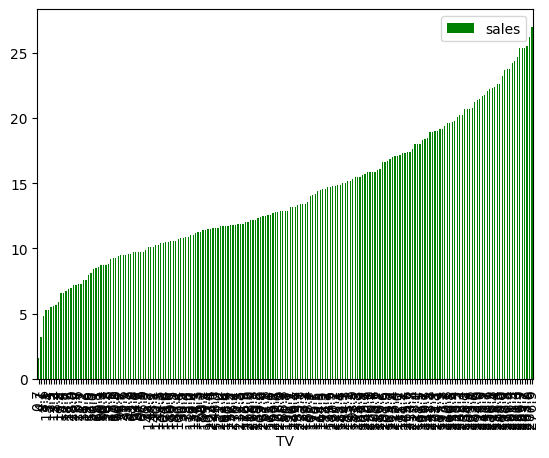

In [29]:
plt.figure(figsize=(15, 20))

df_advertisement.plot(kind='bar',
        x='TV',
        y='sales',
        color='green')


determinar histograma de los datos

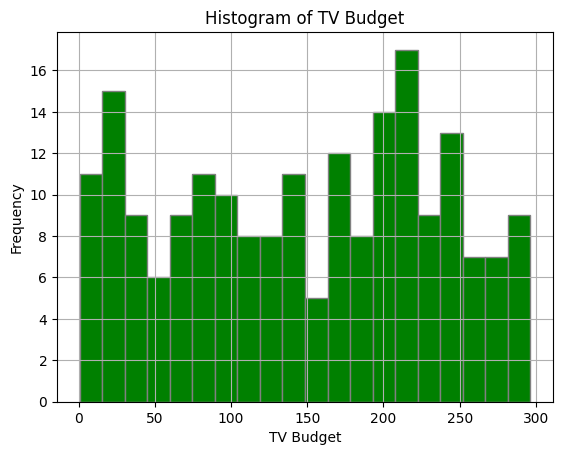

In [38]:
df_advertisement['TV'].hist(bins=20, color='green', edgecolor='gray')
plt.xlabel('TV Budget')
plt.ylabel('Frequency')
plt.title('Histogram of TV Budget')
plt.show()

no muestra un patrón de presupuesto gastado

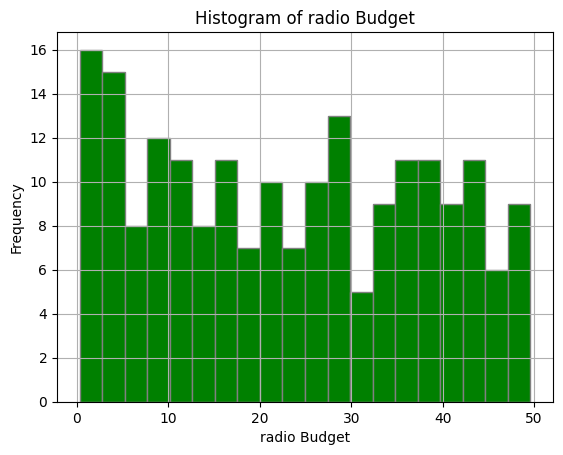

In [47]:
df_advertisement['radio'].hist(bins=20, color='green', edgecolor='gray')
plt.xlabel('radio Budget')
plt.ylabel('Frequency')
plt.title('Histogram of radio Budget')
plt.show()

no se ve un patron definido

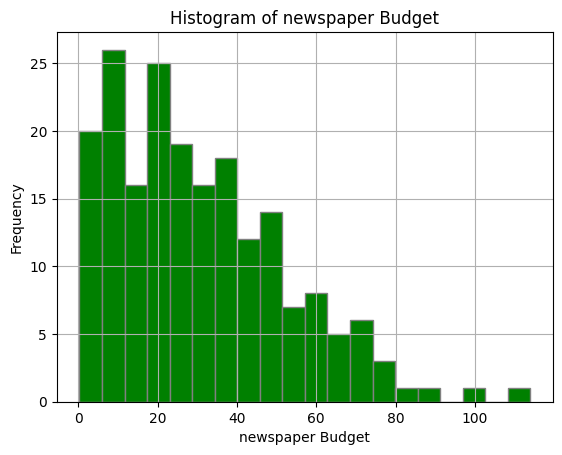

In [44]:
df_advertisement['newspaper'].hist(bins=20, color='green', edgecolor='gray', )
plt.xlabel('newspaper Budget')
plt.ylabel('Frequency')
plt.title('Histogram of newspaper Budget')
plt.show()

encontramos un patrón en el presupuesto de periódico, no se suele gastar tanto y los presupuestos suelen ser bajos

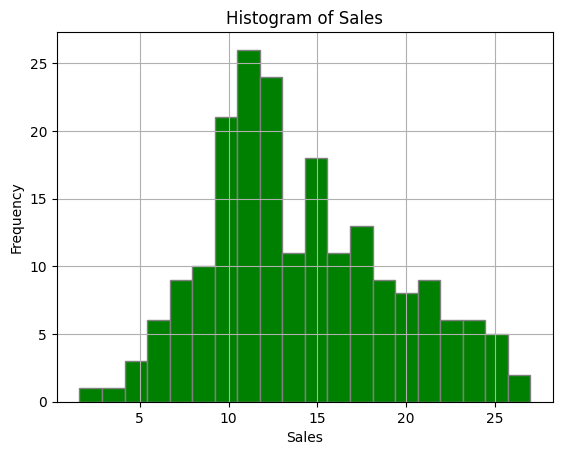

In [55]:
df_advertisement['sales'].hist(bins=20, color='green', edgecolor='gray', )
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()

la tendencia de las ventas está entre 11 y 13

In [57]:
matriz_correlacion = df_advertisement.corr()
matriz_correlacion


,TV,radio,newspaper,sales
TV,1.000000,0.049027,0.053002,0.781462
radio,0.049027,1.000000,0.349361,0.573310
newspaper,0.053002,0.349361,1.000000,0.224455
sales,0.781462,0.573310,0.224455,1.000000


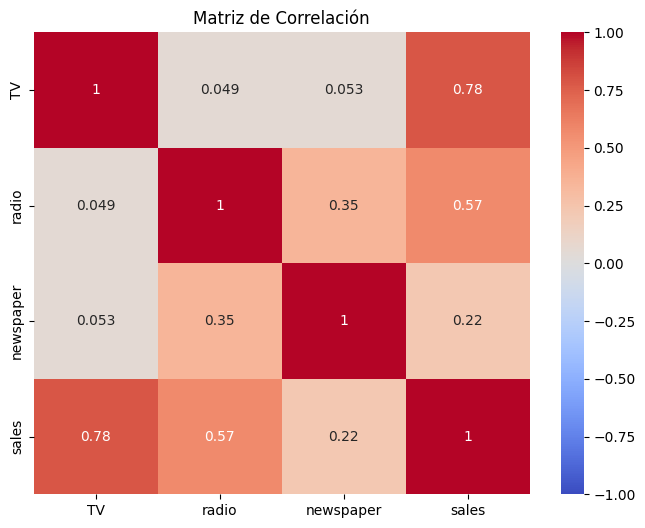

In [62]:
import seaborn as sns
    
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()